## Notebook Summary - Data Visualization
---
#### *This contents of this notebook includes final data visualizations used for storytelling & analysis*

### Data Visualizations
---

In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

### Distribution of word count & character count on combined subreddit data

In [2]:
# read in data
subs = pd.read_csv('cleaned_datasets/subreddits_combined.csv')

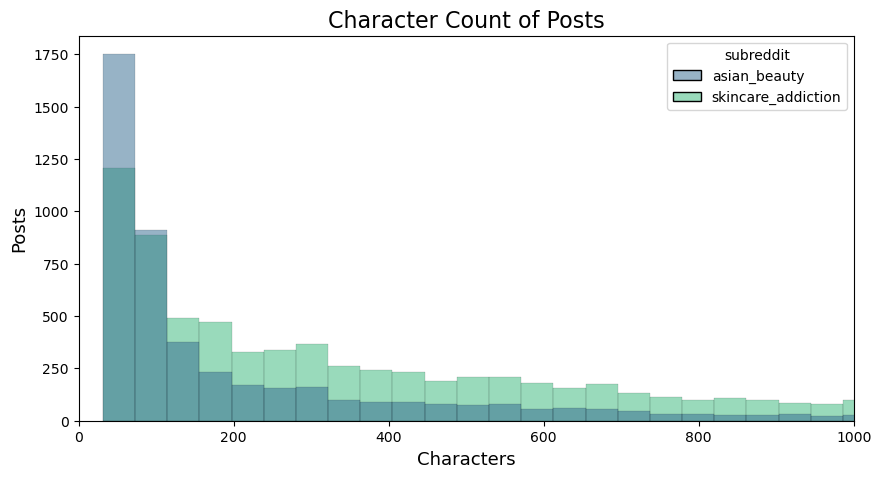

In [3]:
# Distribution of text_length and word_count
# plot a histogram

plt.figure(figsize=(10,5))
sns.histplot(data=subs, x='text_length', hue='subreddit', palette='viridis')
plt.title('Character Count of Posts', fontsize=16, fontweight = 16)
plt.xlabel('Characters', fontsize = 13)
plt.ylabel('Posts', fontsize = 13)
plt.xlim(0,1000);


plt.savefig('plots/character-count.png',dpi=300, bbox_inches = "tight")
# so I set the limit to be a little larger than the 75% percentile because larger values make the visual less visible

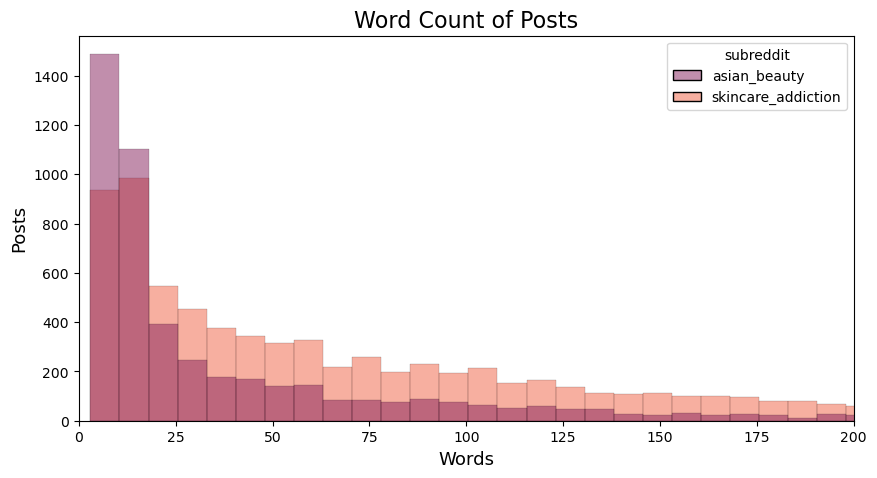

In [4]:
# plot a histogram of word count

plt.figure(figsize=(10,5))
sns.histplot(data=subs, x='word_count', hue='subreddit', palette='rocket')
plt.title('Word Count of Posts', fontsize=16, fontweight = 16)
plt.xlabel('Words', fontsize = 13)
plt.ylabel('Posts', fontsize = 13)
plt.xlim(0,200);

plt.savefig('plots/word-count.png',dpi=300, bbox_inches = "tight")

### Sentiment Score Plots

In [8]:
#read in sentiment data
subs = pd.read_csv('cleaned_datasets/subs_sentiment_analysis.csv')

#### Zooming in on top 25th Percentile of Post Lengths

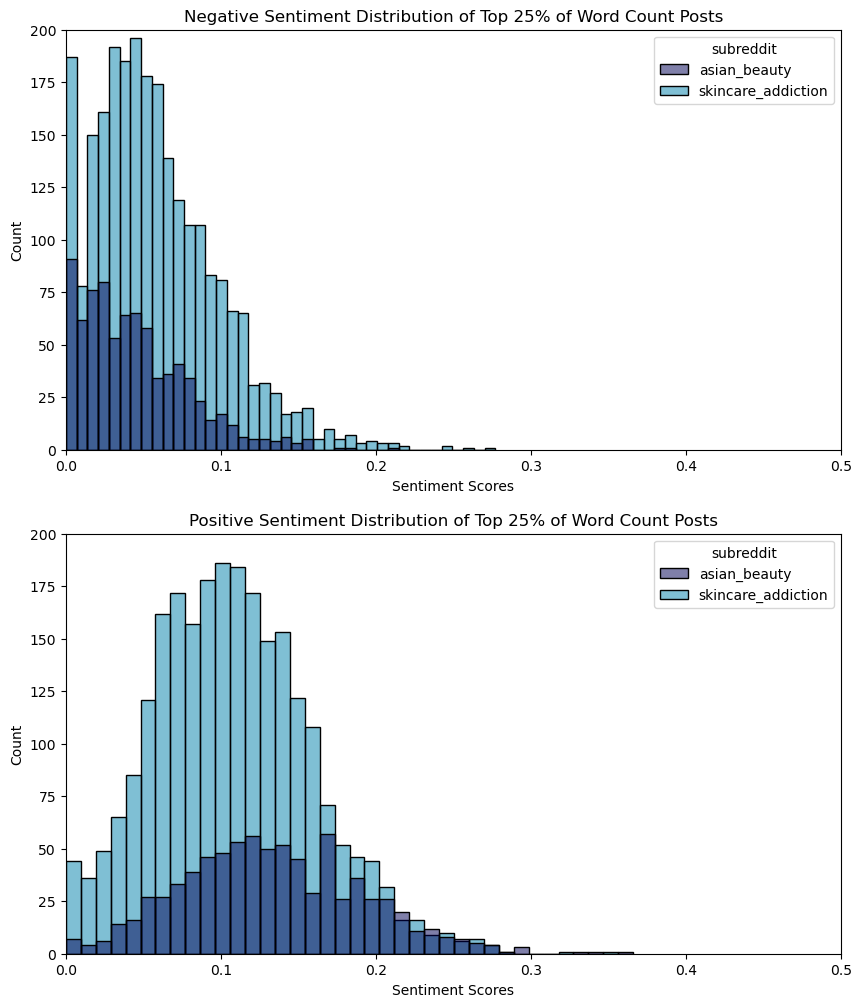

In [10]:
# plot the above 2 on subplots

#create subplots
fig,ax = plt.subplots(2,1, figsize=(10,12))

#plot 1
sns.histplot(data=top,
             x='neg',
             hue='subreddit',
             palette='ocean',
             ax = ax[0],
             );
ax[0].title.set_text('Negative Sentiment Distribution of Top 25% of Word Count Posts')
ax[0].set_xlabel('Sentiment Scores')
ax[0].set_xlim(0,0.5)
ax[0].set_ylim(0,200)


#plot 2
sns.histplot(data=top,
             x='pos',
             hue='subreddit',
             palette='ocean');
ax[1].title.set_text('Positive Sentiment Distribution of Top 25% of Word Count Posts')
ax[1].set_xlabel('Sentiment Scores')
ax[1].set_xlim(0,0.5)
ax[1].set_ylim(0,200)

plt.savefig('plots/top25percentwords.png',dpi=300, bbox_inches = "tight")

### Top Words Across All Subreddits

In [11]:
#read in topwords dataset
topwords = pd.read_csv('cleaned_datasets/topwords.csv')

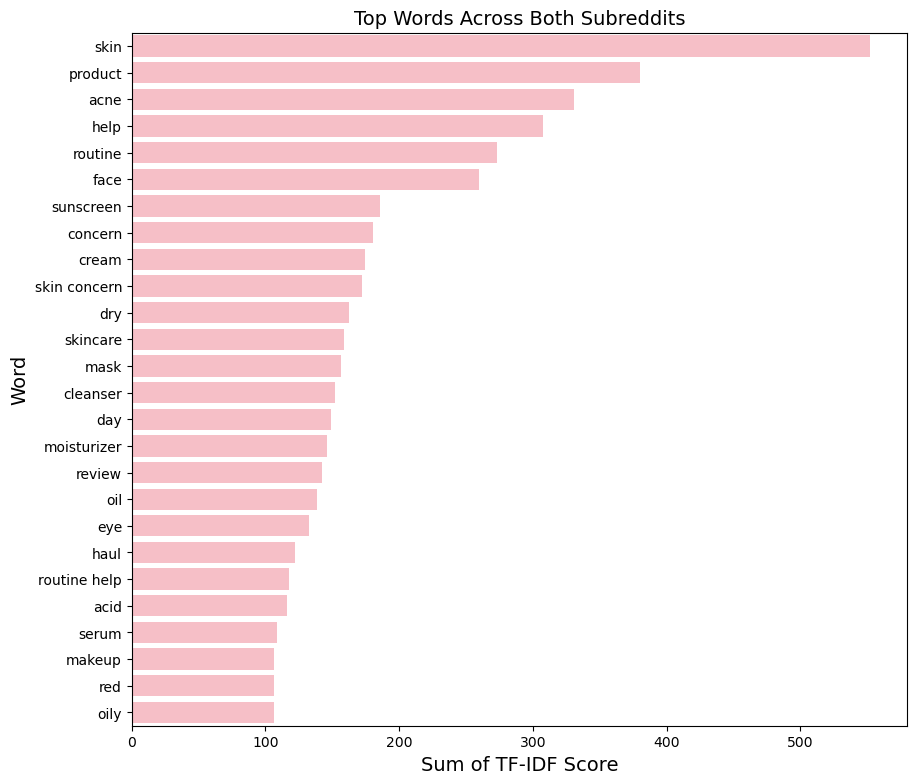

In [12]:
#plot a barplot of top 20 words
plt.figure(figsize=(10,9))
sns.barplot(data=topwords[:26], x='Weight', y='index',
           color='lightpink')

plt.title('Top Words Across Both Subreddits',
          fontsize=14,
          fontweight=12)
plt.xlabel('Sum of TF-IDF Score',
           fontsize=14,
          fontweight=12)
plt.ylabel('Word',
          fontsize=14,
          fontweight=12);

plt.savefig('plots/topwords.png',dpi=300, bbox_inches = "tight")

# topwords['Weight'].sort_values(ascending=False).plot(kind='barh', figsize=(12,20));

### Top Word Predictors of Each Subreddit

In [13]:
coef = pd.read_csv('cleaned_datasets/model_coef.csv')

In [14]:
coef.rename(columns= {'Unnamed: 0': 'Words'}, inplace=True)

In [15]:
coef.rename(columns= {'0': 'Coef'}, inplace=True)

In [16]:
skincareaddiction_top20 = coef[coef['Coef'] > 0][:30]

In [17]:
skincareaddiction_top20

,Words,Coef,odds_of_success
0,acne,0.037862,1.038587
1,product question,0.037053,1.037749
2,skin concern,0.036490,1.037164
3,concern,0.036086,1.036745
4,help,0.033877,1.034458
5,skin,0.033743,1.034319
6,routine help,0.030300,1.030764
7,misc,0.026669,1.027028
8,question,0.025523,1.025852
9,routine,0.024898,1.025211


In [18]:
#drop words that aren't relevant
skincareaddiction_top20.drop(index=[7, 13, 4, 3, 11, 12, 21, 8, 17], inplace=True)

In [19]:
skincareaddiction_top20.reset_index(inplace=True)
skincareaddiction_top20.drop(columns='index', inplace=True)
skincareaddiction_top20

,Words,Coef,odds_of_success
0,acne,0.037862,1.038587
1,product question,0.037053,1.037749
2,skin concern,0.036490,1.037164
3,skin,0.033743,1.034319
4,routine help,0.030300,1.030764
5,routine,0.024898,1.025211
6,rid,0.024670,1.024977
7,bump,0.017706,1.017864
8,advice,0.017704,1.017862
9,sun care,0.017659,1.017815


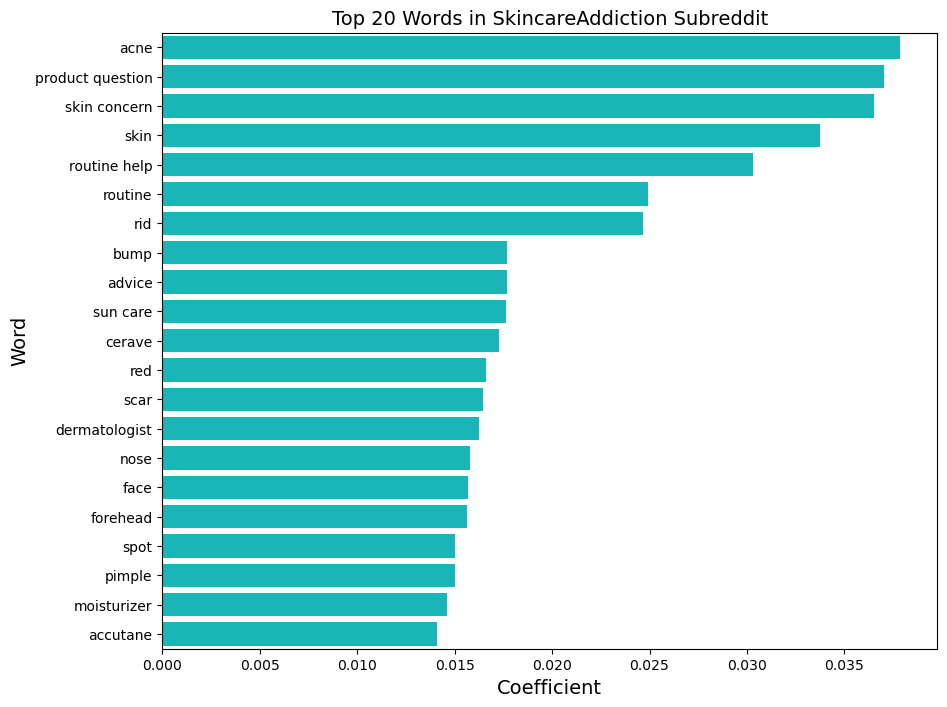

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#plot a barplot of top 20 words
plt.figure(figsize=(10,8))
sns.barplot(data=skincareaddiction_top20, x='Coef', y='Words',
           color='darkturquoise')

plt.title('Top 20 Words in SkincareAddiction Subreddit',
          fontsize=14,
          fontweight=12)
plt.xlabel('Coefficient',
           fontsize=14,
          fontweight=12)
plt.ylabel('Word',
          fontsize=14,
          fontweight=12);

plt.savefig('plots/topwords-skincareaddict.png',dpi=300, bbox_inches = "tight")

In [21]:
asianbeauty_top20 = coef[coef['Coef'] < 0].sort_values(by='Coef')
asianbeauty_top20 = asianbeauty_top20.head(30)

In [22]:
asianbeauty_top20.drop(index=[5483,5481,5480,5479,5470,5474,5464,5465,5466,5461], inplace=True)

In [23]:
asianbeauty_top20

,Words,Coef,odds_of_success
5482,ab,-0.034952,0.965652
5478,haul,-0.024016,0.976270
5477,mask,-0.021747,0.978488
5476,korean,-0.020170,0.980032
5475,essence,-0.019237,0.980947
5473,sheet mask,-0.018489,0.981681
5472,etude,-0.018147,0.982017
5471,bb,-0.017876,0.982283
5469,cushion,-0.017546,0.982607
5468,innisfree,-0.017276,0.982873


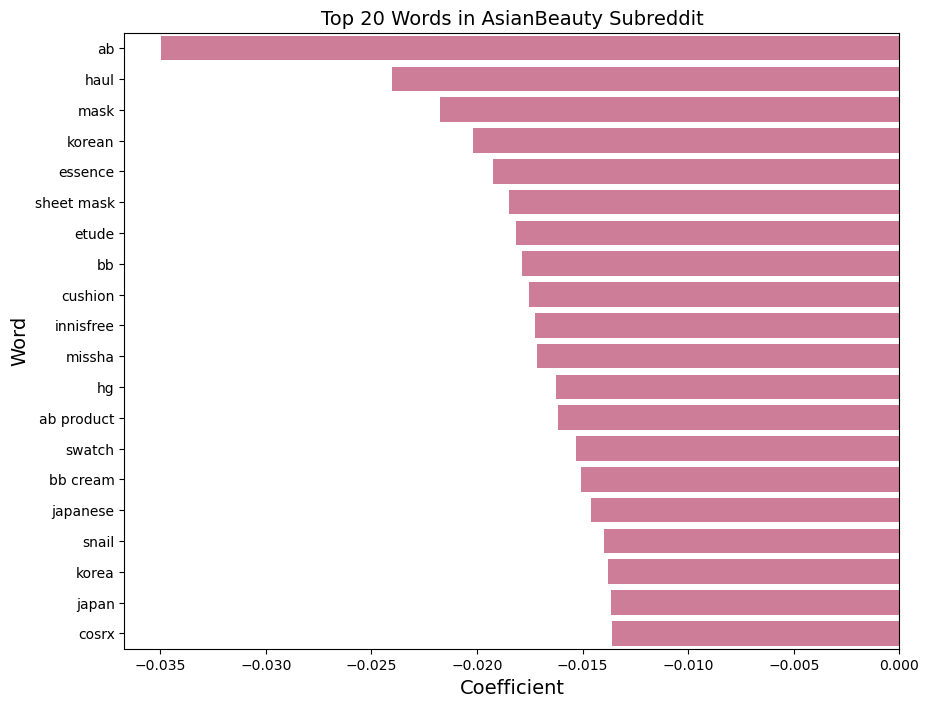

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#plot a barplot of top 20 words
plt.figure(figsize=(10,8))
sns.barplot(data=asianbeauty_top20, x='Coef', y='Words',
           color='palevioletred')

plt.title('Top 20 Words in AsianBeauty Subreddit',
          fontsize=14,
          fontweight=12)
plt.xlabel('Coefficient',
           fontsize=14,
          fontweight=12)
plt.ylabel('Word',
          fontsize=14,
          fontweight=12);

plt.savefig('plots/topwords-asianbeauty.png',dpi=300, bbox_inches = "tight")